<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_5_Compare_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Concorrencia

In [ ]:
import threading
import time
from random import randint

In [ ]:
def funcao_1(num):
  n=num
  while n<0:
    n-=1
    print('n_1:{}'.format(n))
    time.sleep(randint(0,2))

In [ ]:
def funcao_2(num):
  n=num
  while n>100:
    n+=1
    print('n_2:{}'.format(n))
    time.sleep(randint(0,2))

In [ ]:
  t1=threading.Thread(target=funcao_1, args=(0,))
  t2=threading.Thread(target=funcao_2, args=(100,))
  t1.start()
  t2.start()

  t1.join()
  t2.join()

  print('FIM!')

FIM!


# Diabetes

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
uploaded = files.upload()


Saving datasets_diabetes.csv to datasets_diabetes.csv


In [ ]:
df = pd.read_csv("/content/datasets_diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
x=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [ ]:
y.groupby(y).count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
normaliza = MinMaxScaler()
entradas_normalizadas=normaliza.fit_transform(x) 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(537, 8)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(x_train,y_train)
y_pred = clf_KNN.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



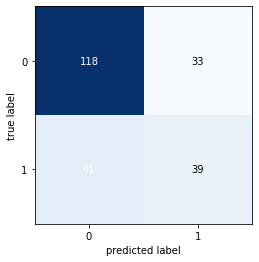

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Arvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier(random_state=1)
tree = tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       151
           1       0.55      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



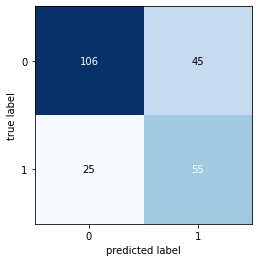

In [ ]:
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       151
           1       0.63      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



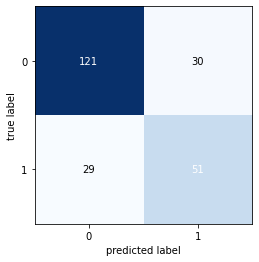

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10,random_state=1)
clf_floresta = clf_floresta.fit(x_train,y_train)
y_pred = clf_floresta.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# SVM

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       151
           1       0.74      0.53      0.61        80

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



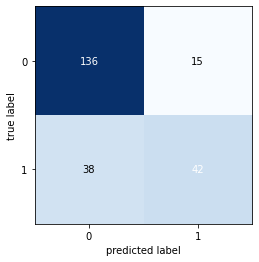

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto',random_state=1)
clf_svm = clf_svm.fit(x_train,y_train)
y_pred = clf_svm.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()

# Rede MLP

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.61      0.64      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



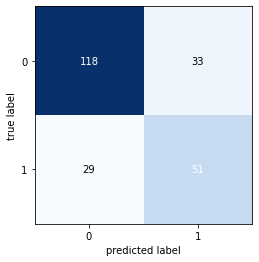

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mp = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,5),random_state=1)
clf_mp = clf_mp.fit(x_train,y_train)
y_pred = clf_mp.predict(x_test)
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()